In [1]:
import os
import torch
from skimage import io, measure
import numpy as np
import matplotlib.pyplot as plt

from tifffile import imread, imsave

import warnings
warnings.filterwarnings('ignore')

import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint, EarlyStopping
import torch.optim as optim
import torch.utils.data as dt


import sys
sys.path.append('/mnt/c/Users/ankit/Desktop/Msc AIML/msc-project/GAP/gap')
from GAP_UNET_ResBlock import UN
from BinomDataset import BinomDataset
from inference import sample_image

## Experiment 1 

Replicate results of covallaria data with high-res images

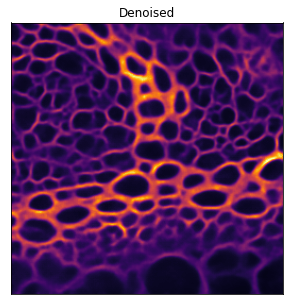

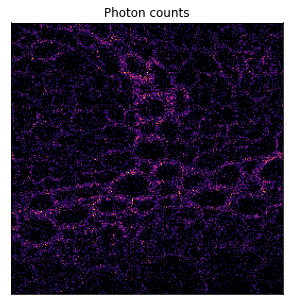

In [2]:
CHECKPOINT_PATH = '/mnt/c/Users/ankit/Desktop/Msc AIML/Data/checkpoints/models/'
name = 'm40tom5-256x256'

model_1 = UN.load_from_checkpoint(os.path.join(CHECKPOINT_PATH, name)+'.ckpt').to('cuda')

channels = 1
batch_size = 1
pixels_x = 256
pixels_y = 256

inp_img =  torch.zeros(batch_size ,channels, pixels_y, pixels_x).to('cuda')


for i in range(1):    
    denoised, photons, stack, iterations = sample_image(inp_img,
                                                        model_1, 
                                                        beta = 0.05,
                                                        save_every_n = 10,
                                                        max_psnr = -5)
    plt.figure(figsize = (5,5))
    plt.imshow(denoised[0,0], cmap='inferno', vmin = 0,
               vmax = np.percentile(denoised[0],99.99))
    plt.title('Denoised')
    plt.xticks([])
    plt.yticks([])
            
    plt.figure(figsize = (5,5))
    plt.imshow(photons[0,0], cmap='inferno', vmin = 0,                   
               vmax = np.percentile(photons[0],99.99))
    plt.title('Photon counts')
    plt.xticks([])
    plt.yticks([])    

## Experiment 2

Replicate results with lowres images

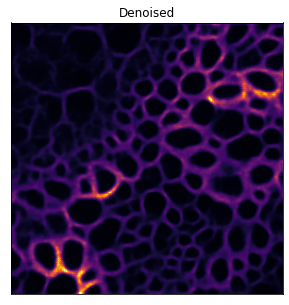

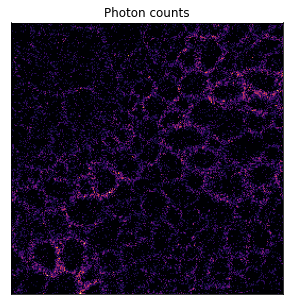

In [23]:
CHECKPOINT_PATH = '/mnt/c/Users/ankit/Desktop/Msc AIML/Data/checkpoints/models/'
name = 'm40tom5-256x256-exp-2'

model_2 = UN.load_from_checkpoint(os.path.join(CHECKPOINT_PATH, name)+'.ckpt').to('cuda')

channels = 1
batch_size = 1
pixels_x = 256
pixels_y = 256

inp_img =  torch.zeros(batch_size ,channels, pixels_y, pixels_x).to('cuda')


for i in range(1):    
    denoised, photons, stack, iterations = sample_image(inp_img,
                                                        model_2, 
                                                        beta = 0.05,
                                                        save_every_n = 10,
                                                        max_psnr = -5)
    plt.figure(figsize = (5,5))
    plt.imshow(denoised[0, 0], cmap='inferno', vmin = 0,
               vmax = np.percentile(denoised[0],99.99))
    plt.title('Denoised')
    plt.xticks([])
    plt.yticks([])
            
    plt.figure(figsize = (5,5))
    plt.imshow(photons[0,0], cmap='inferno', vmin = 0,                   
               vmax = np.percentile(photons[0],99.99))
    plt.title('Photon counts')
    plt.xticks([])
    plt.yticks([])    

## Experiment 3 

Breast Cancer Dataset with 6 individual images

each image has 50 channels

each channel is considered as separate sample

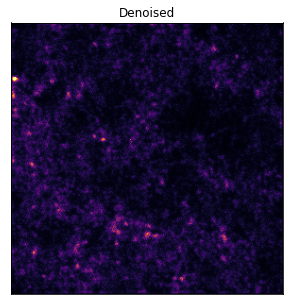

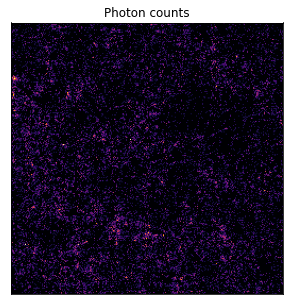

In [27]:
CHECKPOINT_PATH = '/mnt/c/Users/ankit/Desktop/Msc AIML/Data/checkpoints/models/'
name = 'm40tom5-256x256-exp-3'

model_3 = UN.load_from_checkpoint(os.path.join(CHECKPOINT_PATH, name)+'.ckpt').to('cuda')

channels = 1
batch_size = 1
pixels_x = 256
pixels_y = 256

inp_img =  torch.zeros(batch_size ,channels, pixels_y, pixels_x).to('cuda')


for i in range(1):    
    denoised, photons, stack, iterations = sample_image(inp_img,
                                                        model_3, 
                                                        beta = 0.05,
                                                        save_every_n = 10,
                                                        max_psnr = -5)
    plt.figure(figsize = (5,5))
    plt.imshow(denoised[0,0], cmap='inferno', vmin = 0,
               vmax = np.percentile(denoised[0],99.99))
    plt.title('Denoised')
    plt.xticks([])
    plt.yticks([])
            
    plt.figure(figsize = (5,5))
    plt.imshow(photons[0,0], cmap='inferno', vmin = 0,                   
               vmax = np.percentile(photons[0],99.99))
    plt.title('Photon counts')
    plt.xticks([])
    plt.yticks([])    

## Experiment 4

Breast Cancer Dataset with 100 images

each channel is again considered as an separate sample

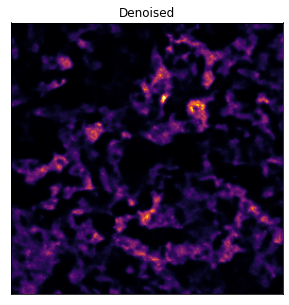

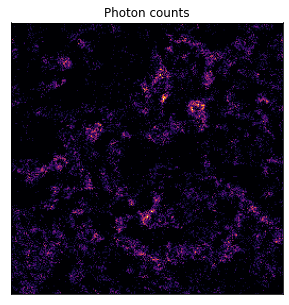

In [36]:
CHECKPOINT_PATH = '/mnt/c/Users/ankit/Desktop/Msc AIML/Data/checkpoints/models/'
name = 'm40tom5-256x256-exp-4'

model_4 = UN.load_from_checkpoint(os.path.join(CHECKPOINT_PATH, name)+'.ckpt').to('cuda')

channels = 1
batch_size = 1
pixels_x = 256
pixels_y = 256

inp_img =  torch.zeros(batch_size ,channels, pixels_y, pixels_x).to('cuda')


for i in range(1):    
    denoised, photons, stack, iterations = sample_image(inp_img,
                                                        model_4, 
                                                        beta = 0.05,
                                                        save_every_n = 10,
                                                        max_psnr = -5)
    plt.figure(figsize = (5,5))
    plt.imshow(denoised[0,0], cmap='inferno', vmin = 0,
               vmax = np.percentile(denoised[0],99.99))
    plt.title('Denoised')
    plt.xticks([])
    plt.yticks([])
            
    plt.figure(figsize = (5,5))
    plt.imshow(photons[0,0], cmap='inferno', vmin = 0,                   
               vmax = np.percentile(photons[0],99.99))
    plt.title('Photon counts')
    plt.xticks([])
    plt.yticks([])    

In [38]:
dataTest = imread('/mnt/c/Users/ankit/Desktop/Msc AIML/Data/convallaria/testData.tif') 

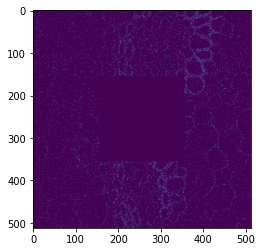

In [17]:
inp = dataTest[0]
square_size = 200
height = width = 512
tl_x = (width - square_size) // 2
tl_y = (height - square_size) // 2
br_x = tl_x + square_size
br_y = tl_y + square_size

masked_inp = inp.copy()

# Set the pixel values in the specified square to black
masked_inp[tl_y:br_y, tl_x:br_x] = 0
plt.imshow(masked_inp)

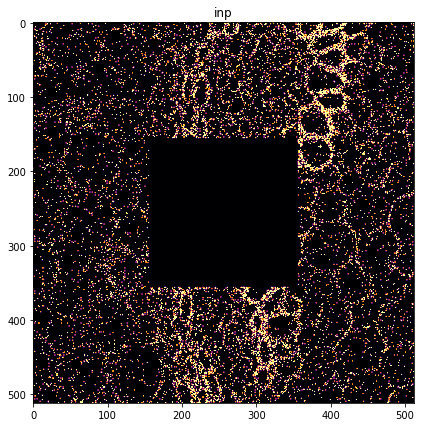

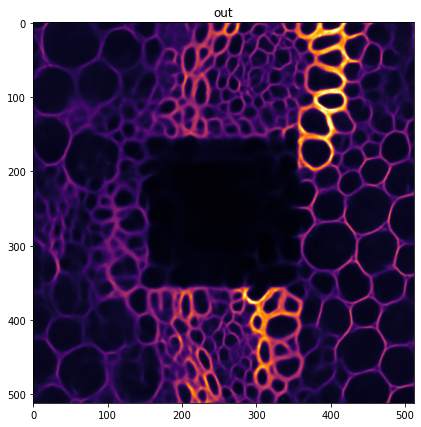

In [21]:
inpT = torch.from_numpy(masked_inp.astype(np.float32)).to('cuda')
out = torch.exp(model_1(inpT[None,None,...]).detach().cpu())
out = inp.sum() * out / out.sum()
    
masked_inp = masked_inp/masked_inp.mean()
out = out/out.mean()
vmax = np.percentile(out,99.9)
    
plt.figure(figsize=(7,7))
plt.imshow(masked_inp,vmin = 0, vmax = vmax, cmap = "inferno")
plt.title('inp')
plt.show()
    
plt.figure(figsize=(7,7))
plt.imshow(out[0,0],vmin = 0,vmax = vmax, cmap = "inferno")
plt.title('out')
plt.show()

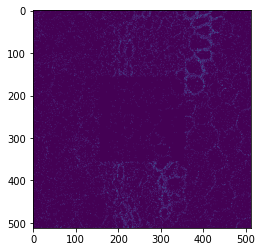

In [36]:
inp = dataTest[0]
square_size = 200
height = width = 512
tl_x = (width - square_size) // 2
tl_y = (height - square_size) // 2
br_x = tl_x + square_size
br_y = tl_y + square_size

masked_inp = inp.copy()

# Set the pixel values in the specified square to black
masked_inp[tl_y:br_y, tl_x:br_x] = 0.5 * masked_inp[tl_y:br_y, tl_x:br_x]
plt.imshow(masked_inp)

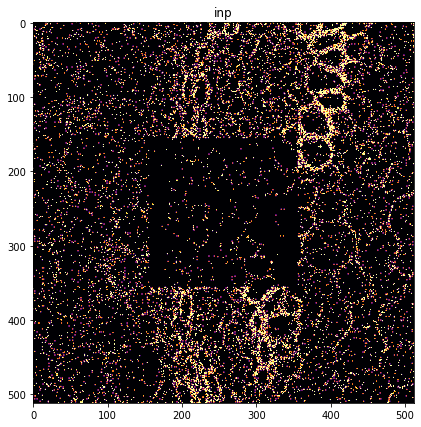

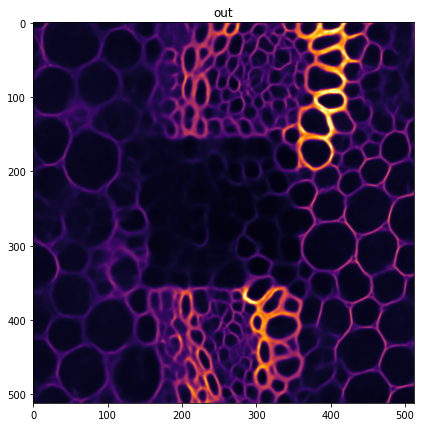

In [37]:
inpT = torch.from_numpy(masked_inp.astype(np.float32)).to('cuda')
out = torch.exp(model_1(inpT[None,None,...]).detach().cpu())
out = inp.sum() * out / out.sum()
    
masked_inp = masked_inp/masked_inp.mean()
out = out/out.mean()
vmax = np.percentile(out,99.9)
    
plt.figure(figsize=(7,7))
plt.imshow(masked_inp,vmin = 0, vmax = vmax, cmap = "inferno")
plt.title('inp')
plt.show()
    
plt.figure(figsize=(7,7))
plt.imshow(out[0,0],vmin = 0,vmax = vmax, cmap = "inferno")
plt.title('out')
plt.show()